In [1]:
import http.client
import json
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

NFT Tranfers in February 2023

In [2]:
conn = http.client.HTTPSConnection("streaming.bitquery.io")
payload0 = json.dumps({
   "query": "{\n  EVM(dataset: combined, network: eth) {\n    Transfers(\n      orderBy: {ascending: Block_Date}\n      where: {Block: {Date: {since: \"2023-02-01\", till: \"2023-03-01\"}}, Transfer: {Currency: {Fungible: false}}}\n    ) {\n      Block {\n        Date\n      }\n      count\n    }\n  }\n}\n",
   "variables": "{}"
})
headers = {
   'Content-Type': 'application/json',
   'X-API-KEY': 'BQYdO11cbRp3kwtJsrLSTOHnuapbJL48'
}
conn.request("POST", "/graphql", payload0, headers)
res0 = conn.getresponse()
data0 = res0.read()
response0= json.loads(data0.decode("utf-8"))
print(response0)

{'data': {'EVM': {'Transfers': [{'Block': {'Date': '2023-02-01'}, 'count': '276855'}, {'Block': {'Date': '2023-02-02'}, 'count': '234185'}, {'Block': {'Date': '2023-02-03'}, 'count': '288370'}, {'Block': {'Date': '2023-02-04'}, 'count': '287435'}, {'Block': {'Date': '2023-02-05'}, 'count': '264605'}, {'Block': {'Date': '2023-02-06'}, 'count': '229436'}, {'Block': {'Date': '2023-02-07'}, 'count': '189348'}, {'Block': {'Date': '2023-02-08'}, 'count': '215485'}, {'Block': {'Date': '2023-02-09'}, 'count': '248798'}, {'Block': {'Date': '2023-02-10'}, 'count': '306768'}, {'Block': {'Date': '2023-02-11'}, 'count': '387566'}, {'Block': {'Date': '2023-02-12'}, 'count': '376424'}, {'Block': {'Date': '2023-02-13'}, 'count': '333440'}, {'Block': {'Date': '2023-02-14'}, 'count': '246071'}, {'Block': {'Date': '2023-02-15'}, 'count': '246133'}, {'Block': {'Date': '2023-02-16'}, 'count': '219234'}, {'Block': {'Date': '2023-02-17'}, 'count': '287262'}, {'Block': {'Date': '2023-02-18'}, 'count': '279317

In [3]:
dt0= response0['data']['EVM']['Transfers']
df_nft_feb = pd.json_normalize(dt0)
df_nft_feb.head(5)

,count,Block.Date
0,276855,2023-02-01
1,234185,2023-02-02
2,288370,2023-02-03
3,287435,2023-02-04
4,264605,2023-02-05


In [4]:
df_nft_feb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   count       29 non-null     object
 1   Block.Date  29 non-null     object
dtypes: object(2)
memory usage: 592.0+ bytes


In [5]:
df_nft_feb['count'] =  pd.to_numeric(df_nft_feb['count'])
df_nft_feb['Block.Date'] = pd.to_datetime(df_nft_feb['Block.Date'])
df_nft_feb['Block.Date'] = df_nft_feb['Block.Date'].dt.day
df_nft_feb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   count       29 non-null     int64
 1   Block.Date  29 non-null     int64
dtypes: int64(2)
memory usage: 592.0 bytes


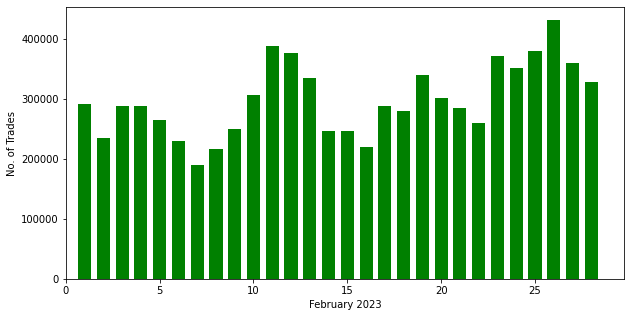

In [43]:
plt.figure(figsize= (10,5))
plt.bar(df_nft_feb['Block.Date'], df_nft_feb['count'], color='green', width=0.7)
plt.xlabel('February 2023')
plt.ylabel('No. of Trades')
plt.xlim(xmin=0)
plt.show()

Top traded NFTs in Feb 2023

In [7]:
conn = http.client.HTTPSConnection("streaming.bitquery.io")
payload3 = json.dumps({
   "query": "{\n  EVM(dataset: combined, network: eth) {\n    Transfers(\n      orderBy: {descendingByField: \"count\"}\n      limit: {count: 30}\n      where: {Block: {Date: {since: \"2023-02-01\", till: \"2023-03-01\"}}, Transfer: {Currency: {Fungible: false}}}\n    ) {\n      Transfer {\n        Currency {\n          Symbol\n          SmartContract\n        }\n      }\n      count\n      senders: uniq(of: Transfer_Sender, method: approximate)\n      receivers: uniq(of: Transfer_Receiver, method: approximate)\n      ids: uniq(of: Transfer_Id, method: approximate)\n    }\n  }\n}\n",
   "variables": "{}"
})

conn.request("POST", "/graphql", payload3, headers)
res3 = conn.getresponse()
data3 = res3.read()
response3= json.loads(data3.decode("utf-8"))

dt_top_nfts_feb= response3['data']['EVM']['Transfers']
df_top_nfts_feb = pd.json_normalize(dt_top_nfts_feb)
df_top_nfts_feb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   count                            30 non-null     object
 1   ids                              30 non-null     object
 2   receivers                        30 non-null     object
 3   senders                          30 non-null     object
 4   Transfer.Currency.SmartContract  30 non-null     object
 5   Transfer.Currency.Symbol         30 non-null     object
dtypes: object(6)
memory usage: 1.5+ KB


In [8]:
df_top_nfts_feb['count'] = pd.to_numeric(df_top_nfts_feb['count'])
df_top_nfts_feb['senders'] = pd.to_numeric(df_top_nfts_feb['senders'])
df_top_nfts_feb['receivers'] = pd.to_numeric(df_top_nfts_feb['receivers'])
df_top_nfts_feb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   count                            30 non-null     int64 
 1   ids                              30 non-null     object
 2   receivers                        30 non-null     int64 
 3   senders                          30 non-null     int64 
 4   Transfer.Currency.SmartContract  30 non-null     object
 5   Transfer.Currency.Symbol         30 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.5+ KB


In [9]:
df_top_nfts_feb = df_top_nfts_feb.drop([df_top_nfts_feb.index[2], df_top_nfts_feb.index[9], df_top_nfts_feb.index[25]])
df_top_nfts_feb

,count,ids,receivers,senders,Transfer.Currency.SmartContract,Transfer.Currency.Symbol
0,541708,403757,401885,96151,0xd4307e0acd12cf46fd6cf93bc264f5d5d1598792,BASEINTRODUCED
1,115391,39116,11720,7895,0x7c10c8816575e8fdfb11463dd3811cc794a1d407,UINTS
3,80340,12622,11243,12630,0x6339e5e072086621540d0362c4e3cea0d643e114,OPEPEN
4,75355,19857,11829,10173,0xbd8451d2d5fb88469a764b05c1e0b623c5106145,VVMRG
5,65917,63243,3912,159,0xac38e9d5102c19d9961d0b92c572cc1c0e280ef2,STONE
6,64422,63891,2658,112,0x62a08a59046b2bd7045042dcab7c04d136d3b1df,FPP
7,51635,9719,6247,7624,0x34d85c9cdeb23fa97cb08333b511ac86e1c4e258,OTHR
8,48729,34036,23815,13493,0x495f947276749ce646f68ac8c248420045cb7b5e,OPENSTORE
10,42117,7,17566,9030,0xe70659b717112ac4e14284d0db2f5d5703df8e43,PROJECTX
11,41213,60,14510,11974,0x66ec993bc3b6f235583a64a67bd4d6d9d5ac84d5,KSP


In [10]:
df_top_nfts_feb =  df_top_nfts_feb.drop(df_top_nfts_feb.index[0])

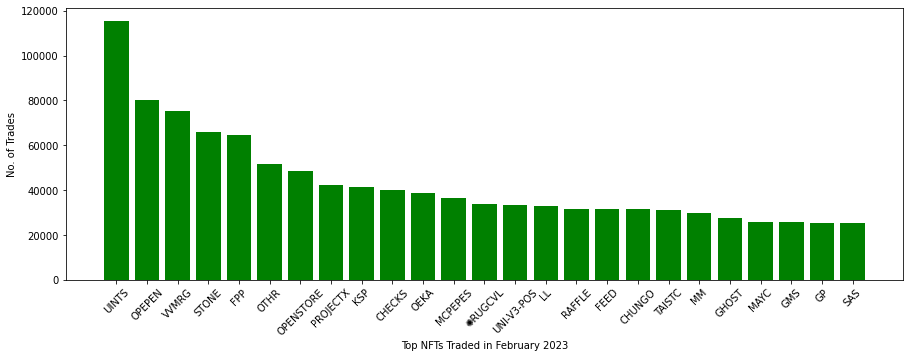

In [37]:
plt.figure(figsize=(15,5))
plt.bar(df_top_nfts_feb['Transfer.Currency.Symbol'], df_top_nfts_feb['count'], color='green')
plt.xlabel('Top NFTs Traded in February 2023')
plt.ylabel('No. of Trades')
plt.xticks(rotation=45)
plt.show() 

Other than above data Base, Introduced NFTs received 500k+ trades in Feb alone

NFT Transfers During Regulators packed period (September 2023)

In [12]:

conn = http.client.HTTPSConnection("streaming.bitquery.io")
payload = json.dumps({
   "query": "{\n  EVM(dataset: combined, network: eth) {\n    Transfers(\n      orderBy: {ascending: Block_Date}\n      where: {Block: {Date: {since: \"2023-9-01\", till: \"2023-10-01\"}}, Transfer: {Currency: {Fungible: false}}}\n    ) {\n      Block {\n        Date\n      }\n      count\n    }\n  }\n}\n",
   "variables": "{}"
})
headers = {
   'Content-Type': 'application/json',
   'X-API-KEY': 'BQYdO11cbRp3kwtJsrLSTOHnuapbJL48'
}
conn.request("POST", "/graphql", payload, headers)
res = conn.getresponse()
data = res.read()
response= json.loads(data.decode("utf-8"))
print(response)


{'data': {'EVM': {'Transfers': [{'Block': {'Date': '2023-09-01'}, 'count': '145637'}, {'Block': {'Date': '2023-09-02'}, 'count': '104272'}, {'Block': {'Date': '2023-09-03'}, 'count': '93897'}, {'Block': {'Date': '2023-09-04'}, 'count': '125071'}, {'Block': {'Date': '2023-09-05'}, 'count': '160966'}, {'Block': {'Date': '2023-09-06'}, 'count': '161740'}, {'Block': {'Date': '2023-09-07'}, 'count': '141062'}, {'Block': {'Date': '2023-09-08'}, 'count': '184425'}, {'Block': {'Date': '2023-09-09'}, 'count': '123643'}, {'Block': {'Date': '2023-09-10'}, 'count': '161540'}, {'Block': {'Date': '2023-09-11'}, 'count': '131652'}, {'Block': {'Date': '2023-09-12'}, 'count': '105835'}, {'Block': {'Date': '2023-09-13'}, 'count': '153006'}, {'Block': {'Date': '2023-09-14'}, 'count': '196569'}, {'Block': {'Date': '2023-09-15'}, 'count': '120837'}, {'Block': {'Date': '2023-09-16'}, 'count': '132694'}, {'Block': {'Date': '2023-09-17'}, 'count': '139284'}, {'Block': {'Date': '2023-09-18'}, 'count': '102830'

In [68]:
data_table= response['data']['EVM']['Transfers']
df_nft_sept = pd.json_normalize(data_table)
df_nft_sept.head(5)

,count,Block.Date
0,145637,2023-09-01
1,104272,2023-09-02
2,93897,2023-09-03
3,125071,2023-09-04
4,160966,2023-09-05


In [14]:
df_nft_sept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   count       31 non-null     object
 1   Block.Date  31 non-null     object
dtypes: object(2)
memory usage: 624.0+ bytes


In [69]:
df_nft_sept['count'] =  pd.to_numeric(df_nft_sept['count'])
df_nft_sept['Block.Date'] = pd.to_datetime(df_nft_sept['Block.Date'])
df_nft_sept['Block.Date'] = df_nft_sept['Block.Date'].dt.day
df_nft_sept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   count       31 non-null     int64
 1   Block.Date  31 non-null     int64
dtypes: int64(2)
memory usage: 624.0 bytes


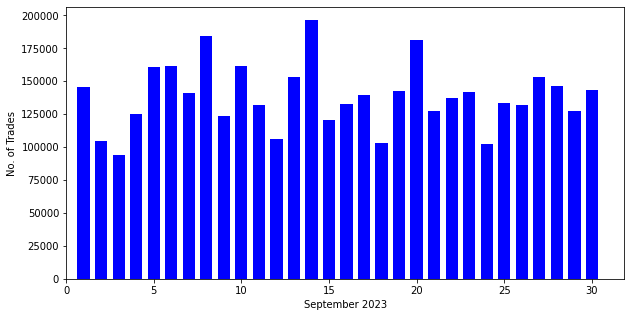

In [70]:
plt.figure(figsize= (10,5))
plt.bar(df_nft_sept['Block.Date'], df_nft_sept['count'], color='blue', width=0.7)
plt.xlim(xmin=0)
plt.xlabel('September 2023')
plt.ylabel('No. of Trades')
plt.show()

In [17]:
conn = http.client.HTTPSConnection("streaming.bitquery.io")
payload2 = json.dumps({
   "query": "{\n  EVM(dataset: combined, network: eth) {\n    Transfers(\n      orderBy: {descendingByField: \"count\"}\n      limit: {count: 30}\n      where: {Block: {Date: {since: \"2023-09-01\", till: \"2023-10-01\"}}, Transfer: {Currency: {Fungible: false}}}\n    ) {\n      Transfer {\n        Currency {\n          Symbol\n          SmartContract\n        }\n      }\n      count\n      senders: uniq(of: Transfer_Sender, method: approximate)\n      receivers: uniq(of: Transfer_Receiver, method: approximate)\n      ids: uniq(of: Transfer_Id, method: approximate)\n    }\n  }\n}\n",
   "variables": "{}"
})
conn.request("POST", "/graphql", payload2, headers)
res2 = conn.getresponse()
data2 = res2.read()
response2= json.loads(data2.decode("utf-8"))
print(response2)

{'data': {'EVM': {'Transfers': [{'Transfer': {'Currency': {'SmartContract': '0x3539ac68bc96fc1f470d7739a49bbbf3d321fd5d', 'Symbol': 'B-BRN'}}, 'count': '171735', 'ids': '170626', 'receivers': '12777', 'senders': '656'}, {'Transfer': {'Currency': {'SmartContract': '0x699a884a3e41bbab0b9b68ac6d749e64cbe3ea7b', 'Symbol': 'USDCGOLD.COM'}}, 'count': '82108', 'ids': '250', 'receivers': '81699', 'senders': '2'}, {'Transfer': {'Currency': {'SmartContract': '0x7183bb21a9fd0cd2af098895c0e470b7f61c4a17', 'Symbol': 'CARELLA'}}, 'count': '78081', 'ids': '77906', 'receivers': '8730', 'senders': '29'}, {'Transfer': {'Currency': {'SmartContract': '0x6b343dc8d8bf3941e34701bf93782537ef66f140', 'Symbol': 'WPART'}}, 'count': '75407', 'ids': '38130', 'receivers': '1313', 'senders': '1101'}, {'Transfer': {'Currency': {'SmartContract': '0xb759b80efd95c17c3ef82fcf0b94c1df4c72c83a', 'Symbol': ' Voucher '}}, 'count': '72000', 'ids': '1', 'receivers': '72233', 'senders': '1'}, {'Transfer': {'Currency': {'SmartCo

In [18]:
dt_top_nfts_sept= response2['data']['EVM']['Transfers']
df_top_nfts_sept = pd.json_normalize(dt_top_nfts_sept)
df_top_nfts_sept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   count                            30 non-null     object
 1   ids                              30 non-null     object
 2   receivers                        30 non-null     object
 3   senders                          30 non-null     object
 4   Transfer.Currency.SmartContract  30 non-null     object
 5   Transfer.Currency.Symbol         30 non-null     object
dtypes: object(6)
memory usage: 1.5+ KB


In [19]:
df_top_nfts_sept['count'] = pd.to_numeric(df_top_nfts_sept['count'])
df_top_nfts_sept['senders'] = pd.to_numeric(df_top_nfts_sept['senders'])
df_top_nfts_sept['receivers'] = pd.to_numeric(df_top_nfts_sept['receivers'])
df_top_nfts_sept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   count                            30 non-null     int64 
 1   ids                              30 non-null     object
 2   receivers                        30 non-null     int64 
 3   senders                          30 non-null     int64 
 4   Transfer.Currency.SmartContract  30 non-null     object
 5   Transfer.Currency.Symbol         30 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.5+ KB


In [20]:
df_top_nfts_sept

,count,ids,receivers,senders,Transfer.Currency.SmartContract,Transfer.Currency.Symbol
0,171735,170626,12777,656,0x3539ac68bc96fc1f470d7739a49bbbf3d321fd5d,B-BRN
1,82108,250,81699,2,0x699a884a3e41bbab0b9b68ac6d749e64cbe3ea7b,USDCGOLD.COM
2,78081,77906,8730,29,0x7183bb21a9fd0cd2af098895c0e470b7f61c4a17,CARELLA
3,75407,38130,1313,1101,0x6b343dc8d8bf3941e34701bf93782537ef66f140,WPART
4,72000,1,72233,1,0xb759b80efd95c17c3ef82fcf0b94c1df4c72c83a,Voucher
5,61151,45978,6247,9344,0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85,
6,52022,49566,6907,629,0x33edfa311fd59942bdc7713a6e45feece9c459c8,ORG
7,50614,600,50002,2,0xc63d4171dfa493a1566ad747cb514b02a392b02c,UNI Airdrop Pass
8,49462,49453,49455,1,0x0000000000664ceffed39244a8312bd895470803,FUNPASS
9,46956,46949,46954,1,0xd2bdd497db05622576b6cb8082fb08de042987ca,CHEST


In [21]:
# df_top_nfts.head(5)
df_top_nfts_sept = df_top_nfts_sept.drop([df_top_nfts_sept.index[5], df_top_nfts_sept.index[14]])
# df_top_nfts['Transfer.Currency.Symbol'].isnull()
df_top_nfts_sept

,count,ids,receivers,senders,Transfer.Currency.SmartContract,Transfer.Currency.Symbol
0,171735,170626,12777,656,0x3539ac68bc96fc1f470d7739a49bbbf3d321fd5d,B-BRN
1,82108,250,81699,2,0x699a884a3e41bbab0b9b68ac6d749e64cbe3ea7b,USDCGOLD.COM
2,78081,77906,8730,29,0x7183bb21a9fd0cd2af098895c0e470b7f61c4a17,CARELLA
3,75407,38130,1313,1101,0x6b343dc8d8bf3941e34701bf93782537ef66f140,WPART
4,72000,1,72233,1,0xb759b80efd95c17c3ef82fcf0b94c1df4c72c83a,Voucher
6,52022,49566,6907,629,0x33edfa311fd59942bdc7713a6e45feece9c459c8,ORG
7,50614,600,50002,2,0xc63d4171dfa493a1566ad747cb514b02a392b02c,UNI Airdrop Pass
8,49462,49453,49455,1,0x0000000000664ceffed39244a8312bd895470803,FUNPASS
9,46956,46949,46954,1,0xd2bdd497db05622576b6cb8082fb08de042987ca,CHEST
10,45099,90,45002,2,0x89430ac32b6e5386d9554d2253c37160556acd70,HEX Pool Position


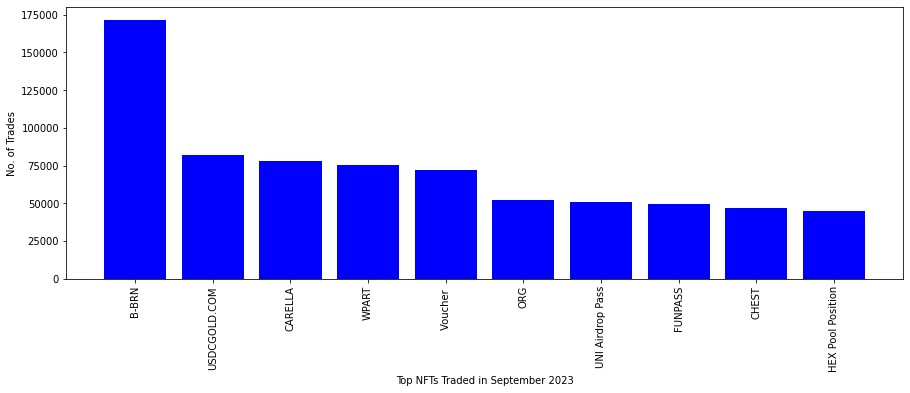

In [84]:

plt.figure(figsize=(15,5))
plt.bar(df_top_nfts_sept['Transfer.Currency.Symbol'].head(10), df_top_nfts_sept['count'].head(10), color='blue')
plt.xticks(rotation=90)
plt.xlabel('Top NFTs Traded in September 2023')
plt.ylabel('No. of Trades')
plt.show() 

Comparsion between the two

In [65]:
df_nft_feb = df_nft_feb.drop(df_nft_feb.index[28])

In [73]:
df_nft_sept = df_nft_sept.drop(df_nft_sept.index[30])

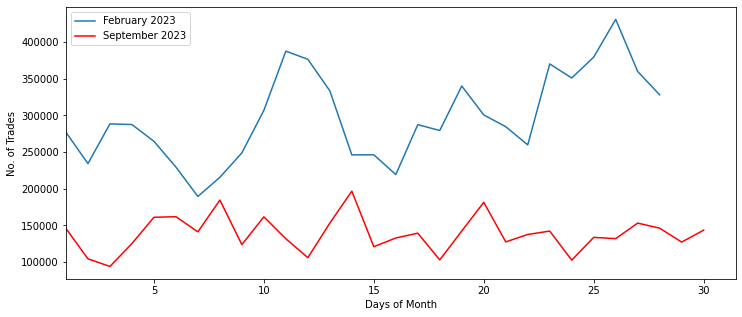

In [80]:
plt.figure(figsize=(12,5))
plt.plot(df_nft_feb['Block.Date'], df_nft_feb['count'])
plt.plot(df_nft_sept['Block.Date'], df_nft_sept['count'], color='red' )
plt.xlabel('Days of Month')
plt.ylabel('No. of Trades')
plt.legend(["February 2023", "September 2023"], loc ="upper left") 
plt.xlim(xmin=1)
plt.show()


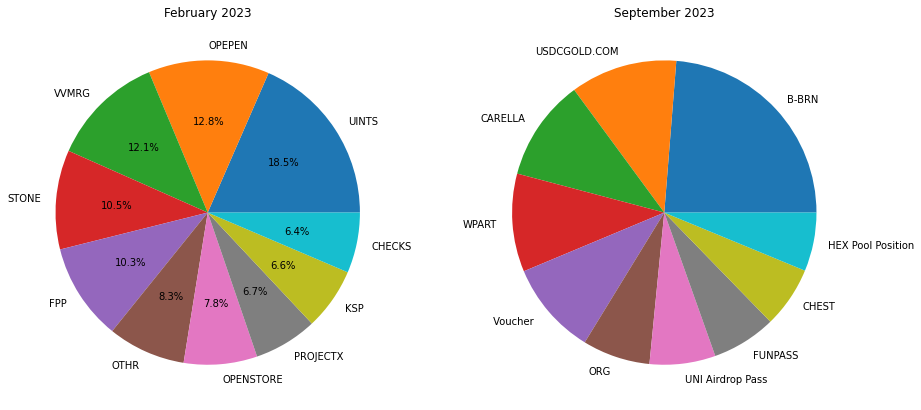

In [96]:
fig = plt.figure(figsize =(15, 7))

ax1 = fig.add_subplot(121)
ax1.pie(df_top_nfts_feb['count'].head(10), labels = df_top_nfts_feb['Transfer.Currency.Symbol'].head(10), autopct='%1.1f%%')
ax2 = fig.add_subplot(122)
ax2.pie(df_top_nfts_sept['count'].head(10), labels = df_top_nfts_sept['Transfer.Currency.Symbol'].head(10), autopct='%1.1f%%')
# plt.xlabel('February 2023')
# plt.xlabel('September 2023')
ax1.set_title('February 2023')
ax2.set_title('September 2023')
plt.show()

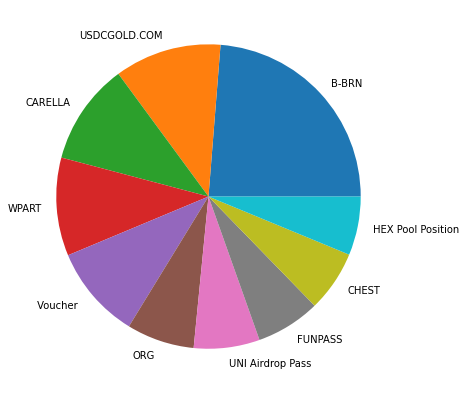

In [87]:
fig = plt.figure(figsize =(10, 7))
plt.pie(df_top_nfts_sept['count'].head(10), labels = df_top_nfts_sept['Transfer.Currency.Symbol'].head(10))
plt.show()